# Temporal mismatch diagnostics

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import dask.dataframe as dd
import os
from glob import glob

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.geodesic as cgeo

import matplotlib.transforms as mtransforms
crs = ccrs.PlateCarree()

import histlib.matchup as match
from  histlib.diagnosis import build_matchup_dataframe, synthetic_figure, path_csv, put_fig_letter, build_diagnostic
from histlib.cstes import labels, zarr_dir, matchup_dir, c0, U
U2=U**2
zarr_dir =zarr_dir +'_ok'

/home1/datahome/mdemol/.miniconda3/envs/histenv2/lib/python3.9/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'distributed.scheduler.transition-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(
/home1/datahome/mdemol/.miniconda3/envs/histenv2/lib/python3.9/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'distributed.comm.recent-messages-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(


__________
___________
# Compute mean

In [24]:
comb_av_d = {'acc':'drifter_acc_x_25', 'cor':'drifter_coriolis_x_25', 'ggx':'aviso_drifter_ggx_adt', 'wd':'es_cstrio_z15_drifter_wd_x'}
comb_av_al = {'acc':'drifter_acc_x_25', 'cor':'drifter_coriolis_x_25', 'ggx':'aviso_alti_ggx_adt', 'wd':'es_cstrio_z15_drifter_wd_x'}
comb_alg = {'acc':'drifter_acc_x_25','cor':'drifter_coriolis_x_25','ggx':'alti_ggx_adt_filtered_ocean_tide_internal_tide','wd':'es_cstrio_z15_drifter_wd_x'}


dad = pd.read_csv(os.path.join(zarr_dir,'analysis_files', 'time_mean___'+'__'.join([comb_av_d[key] for key in comb_av_d])+'.csv')).set_index('timebin').to_xarray()
#daa = pd.read_csv(os.path.join(zarr_dir,'analysis_files', 'time_mean___'+'__'.join([comb_av_al[key] for key in comb_av_al])+'.csv')).set_index('timebin').to_xarray()
dl = pd.read_csv(os.path.join(zarr_dir,'analysis_files', 'time_mean___'+'__'.join([comb_alg[key] for key in comb_alg])+'.csv')).set_index('timebin').to_xarray()

def center_timebin(df) :
    dl = df.timebin.diff('timebin').mean()/3600
    df['timebin'] = df['timebin']/3600+dl/2
    return df

def prepared(ds) : 
    ds_ = center_timebin(ds).set_coords(['obs', 'nb_coloc_bin', 'alti___time_difference'])/U2
    ds_.nb_coloc_bin.attrs['long_name'] = 'Number of colocalizations per bin'
    ds_.timebin.attrs['long_name'] = 'Temporal colocalization mismatch $\Delta T$'
    ds_.timebin.attrs['units'] = 'h'
    return ds_
    
dad = prepared(dad)
#daa = prepared(daa)
dl = prepared(dl)

In [13]:
dl

<xarray.Dataset>
Dimensions:                 (timebin: 178)
Coordinates:
  * timebin                 (timebin) float64 0.002542 0.01921 ... 1.403 0.9025
    alti___time_difference  (timebin) float64 19.03 89.73 ... 3.268e+03
    obs                     (timebin) float64 5.528e+04 5.464e+04 ... 9.756e+04
    nb_coloc_bin            (timebin) int64 12318 7853 7857 8040 ... 3 2 2 2
Data variables: (12/40)
    B_acc                   (timebin) float64 0.8449 0.9154 ... 11.76 0.02444
    E_acc                   (timebin) float64 0.2222 0.1805 ... 7.733 0.07254
    E_cor                   (timebin) float64 0.6145 0.6706 ... -5.242 -0.04939
    B_cor                   (timebin) float64 3.339 3.14 3.158 ... 14.17 0.08684
    E_ggx                   (timebin) float64 0.7555 0.7893 ... 0.642 0.07857
    B_ggx                   (timebin) float64 2.717 2.585 ... -0.2303 -0.01634
    ...                      ...
    be__ACC                 (timebin) float64 0.02857 0.03943 ... nan nan
    be__COR                 (timebin) float64 0.1178 0.1286 0.1168 ... nan nan
    be__GGX                 (timebin) float64 0.1146 0.1275 0.1106 ... nan nan
    be__WD                  (timebin) float64 0.006034 0.007682 ... nan nan
    be__S                   (timebin) float64 0.04289 0.05671 ... nan nan
    be__sigma               (timebin) float64 0.2241 0.2422 0.2176 ... nan nan

__________
___________
# Distribution

(0.0, 0.5)

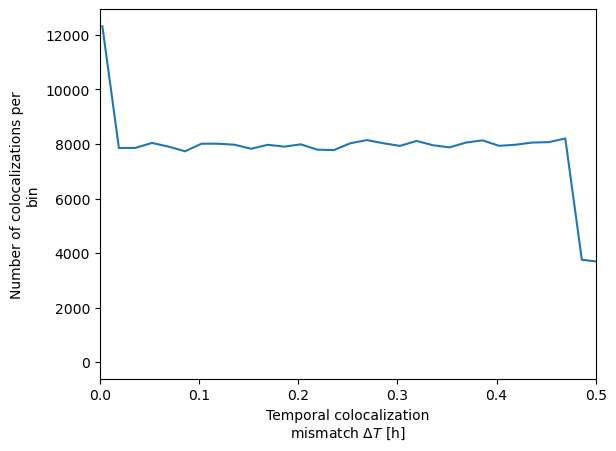

In [15]:
dl.nb_coloc_bin.plot()
plt.xlim(0, 0.5)

__________
___________
# Figures

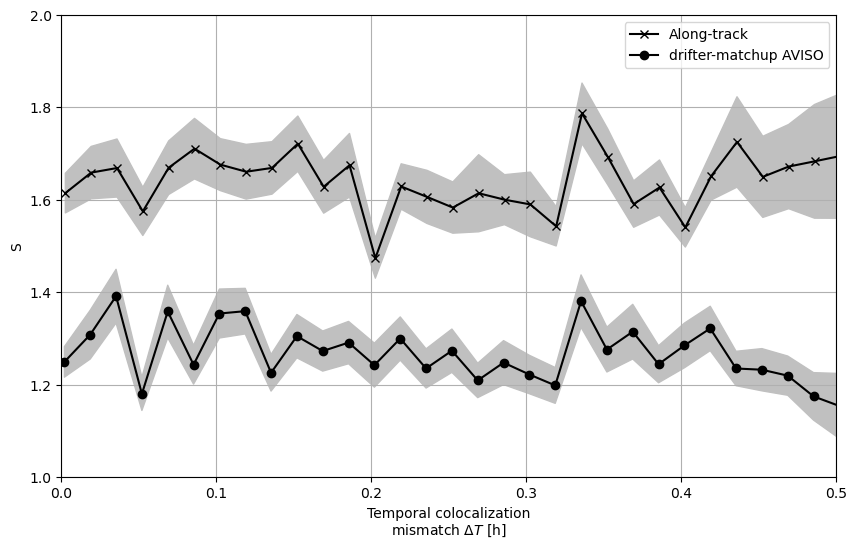

In [26]:
def plot_error(df, v, ax):
    ax.fill_between(df.timebin, df[v]-df['be__'+v], df[v]+df['be__'+v], color='silver')

fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10,6))
dl.S.plot(marker = 'x', label= 'Along-track', c='k')
plot_error(dl, 'S', ax)
dad.S.plot(marker = 'o', label= 'drifter-matchup AVISO', c='k')
plot_error(dad, 'S', ax)
#daa.S.plot(marker = 's', label= 'altimeter-matchup AVISO', c='k')
#plot_error(daa, 'S', ax)





ax.set_xlim(0,0.5)
ax.set_ylim(1,2)
ax.set_xlabel('
ax.grid()
ax.legend()